# IMERG Late - Precipitation Data
 - **@author**: Mario Garcia (mario.garcia@utec.edu.uy)
 - **@version**: v1.2
 - **@date**: 2022-08-06, 2022-08-01, 2022-07-30, 2022-07-26
 - **Url**:  https://gpm.nasa.gov/data/imerg
 - **Output**: imerg_late_daily_2000_2020.nc

## Setup

In [1]:
dir_google_drive = "/content/drive/MyDrive/ValidacionProductosSatelitales(VPS)/Proyecto Colab/03 - DataLake/"
dir_data = './data/'
dir_data_source = dir_data+'/source/'
dir_var = './var/'
dir_download = dir_var+'/download/'
dir_output = dir_var+'/output/'
dir_log = dir_var+'/log/'


### Libraries

In [2]:
!pip install geopandas 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 11.2 MB/s 
     |████████████████████████████████| 16.7 MB 56.7 MB/s 
     |████████████████████████████████| 6.3 MB 55.1 MB/s 


In [3]:
# Data
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# Utils
import os 
# import shutil
import glob

# Zip
import zipfile

# NetCDF
import xarray  as xr

# GEO MAPS
# https://jcutrer.com/python/learn-geopandas-plotting-usmaps
import geopandas as gpd
from shapely.geometry import Point, Polygon


In [4]:
def get_geometry_uruguay():
  df_world_shapes = gpd.read_file(dir_data+"/TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp")
  df_uruguay_shapes = df_world_shapes[ df_world_shapes['ISO2'] == 'UY']
  # df_uruguay_shapes
  polygon_uruguay = df_uruguay_shapes['geometry']
  return polygon_uruguay
  # polygon_uruguay = geometry[210]
  # return gpd.GeoSeries(polygon_uruguay)

### Init

In [5]:
!rm -rf "$dir_data"

!mkdir -p "$dir_data"
!mkdir -p "$dir_data_source"
!mkdir -p "$dir_download"
!mkdir -p "$dir_output"
!mkdir -p "$dir_log"

!mkdir -p "$dir_data"/TM_WORLD_BORDERS
!wget  -O "$dir_download"/TM_WORLD_BORDERS-0.3.zip  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip 
!unzip -o "$dir_download"/TM_WORLD_BORDERS-0.3.zip -d "$dir_data"/TM_WORLD_BORDERS 


--2022-08-06 07:38:50--  http://thematicmapping.org/downloads/TM_WORLD_BORDERS-0.3.zip
Resolving thematicmapping.org (thematicmapping.org)... 67.20.120.230
Connecting to thematicmapping.org (thematicmapping.org)|67.20.120.230|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3464707 (3.3M) [application/zip]
Saving to: ‘./var//download//TM_WORLD_BORDERS-0.3.zip’

./var//download//TM 100%[===================>]   3.30M  2.91MB/s    in 1.1s    

2022-08-06 07:38:51 (2.91 MB/s) - ‘./var//download//TM_WORLD_BORDERS-0.3.zip’ saved [3464707/3464707]

Archive:  ./var//download//TM_WORLD_BORDERS-0.3.zip
  inflating: ./data//TM_WORLD_BORDERS/Readme.txt  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.dbf  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.prj  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shp  
  inflating: ./data//TM_WORLD_BORDERS/TM_WORLD_BORDERS-0.3.shx  


## Download Data

In [6]:
# %%bash
# # https://daac.gsfc.nasa.gov/data-access#windows_wget
# cat > /root/.netrc << EOF
# machine urs.earthdata.nasa.gov login mariogarcia.ar password ***
# machine gpm1.gesdisc.eosdis.nasa.gov login mariogarcia.ar password ***
# EOF
# chmod 0600 /root/.netrc
# touch /root/.urs_cookies


In [7]:
# %%bash
# mkdir -p /content/data
# cd /content/data
# mkdir -p /content/logs

# wget  --load-cookies /root/.urs_cookies \
#       --save-cookies /root/.urs_cookies \
#       --auth-no-challenge=on \
#       --keep-session-cookies \
#       -P /content/data \
#       -b --no-clobber --continue --wait=1 \
#       -o /content/logs/wget.log \
#       -i "/content/data/download.txt"  

In [8]:
# Son 7500 archivos para bajar !!! <<<-----------------
# Hack: tarda mucho tiempo en bajar todo el lote. Uso un atajo bajando una copia que tengo en drive
!gdown -O "$dir_download"/data_imerg_late.tar.gz "1g6him5d7kyzXD9kXZ58T-Ydx1kZA3Emz"

!tar -xvzf "$dir_download"/data_imerg_late.tar.gz  -C "$dir_data_source"

!mv "$dir_data_source"/data_late/*  "$dir_data_source"/
!rm "$dir_download"/data_late/

Streaming output truncated to the last 5000 lines.
data_late/3B-DAY-L.MS.MRG.3IMERG.20030313-S000000-E235959.V06.nc4.nc4?precipitationCal[0:0][1210:1270][549:599],time,lon[1210:1270],lat[549:599]
data_late/3B-DAY-L.MS.MRG.3IMERG.20020716-S000000-E235959.V06.nc4.nc4?precipitationCal[0:0][1210:1270][549:599],time,lon[1210:1270],lat[549:599]
data_late/3B-DAY-L.MS.MRG.3IMERG.20021024-S000000-E235959.V06.nc4.nc4?precipitationCal[0:0][1210:1270][549:599],time,lon[1210:1270],lat[549:599]
data_late/3B-DAY-L.MS.MRG.3IMERG.20100723-S000000-E235959.V06.nc4.nc4?precipitationCal[0:0][1210:1270][549:599],time,lon[1210:1270],lat[549:599]
data_late/3B-DAY-L.MS.MRG.3IMERG.20040505-S000000-E235959.V06.nc4.nc4?precipitationCal[0:0][1210:1270][549:599],time,lon[1210:1270],lat[549:599]
data_late/3B-DAY-L.MS.MRG.3IMERG.20071002-S000000-E235959.V06.nc4.nc4?precipitationCal[0:0][1210:1270][549:599],time,lon[1210:1270],lat[549:599]
data_late/3B-DAY-L.MS.MRG.3IMERG.20100717-S000000-E235959.V06.nc4.nc4?precipita

In [9]:
import glob
# rename files
files = glob.glob(f"{dir_data_source}/*nc4*")
for f in files:
  file = f.split('.nc4?')
  os.rename(f, file[0])

## Config

In [10]:
var_lat = 'lat'
var_lon = 'lon'
var_time = 'time'
var_precipitation = 'precipitationCal'

var_null_values = -598

var_null_values_from_source = -9999.9    #Validate

## Process Data

In [11]:
pattern = dir_data_source+'/*.nc4'
ds_xr_multi = xr.open_mfdataset(pattern,chunks={var_lat: 100, var_lon: 100,var_time: '1GB'})
ds_xr_multi

<xarray.Dataset>
Dimensions:           (time: 7519, lon: 61, lat: 51)
Coordinates:
  * lat               (lat) float32 -35.05 -34.95 -34.85 ... -30.15 -30.05
  * lon               (lon) float32 -58.95 -58.85 -58.75 ... -53.05 -52.95
  * time              (time) object 2000-06-01 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    precipitationCal  (time, lon, lat) float32 dask.array<chunksize=(1, 61, 51), meta=np.ndarray>
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-08-07T19:51:27.150Z
    history:         2022-07-26 06:49:56 GMT Hyrax-1.16.3 https://gpm1.gesdis...

In [12]:
ds_xr_multi[var_precipitation].data

dask.array<concatenate, shape=(7519, 61, 51), dtype=float32, chunksize=(1, 61, 51), chunktype=numpy.ndarray>

### Standarize

In [13]:
names = {var_time:'time', var_precipitation:'precipitation', var_lat:'lat', var_lon:'lon'}
ds_xr_multi = ds_xr_multi.rename(names)
ds_xr_multi

<xarray.Dataset>
Dimensions:        (time: 7519, lon: 61, lat: 51)
Coordinates:
  * lat            (lat) float32 -35.05 -34.95 -34.85 ... -30.25 -30.15 -30.05
  * lon            (lon) float32 -58.95 -58.85 -58.75 ... -53.15 -53.05 -52.95
  * time           (time) object 2000-06-01 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 61, 51), meta=np.ndarray>
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-08-07T19:51:27.150Z
    history:         2022-07-26 06:49:56 GMT Hyrax-1.16.3 https://gpm1.gesdis...

In [14]:
ds_xr_multi = ds_xr_multi[['precipitation']]
ds_xr_multi

<xarray.Dataset>
Dimensions:        (time: 7519, lon: 61, lat: 51)
Coordinates:
  * lat            (lat) float32 -35.05 -34.95 -34.85 ... -30.25 -30.15 -30.05
  * lon            (lon) float32 -58.95 -58.85 -58.75 ... -53.15 -53.05 -52.95
  * time           (time) object 2000-06-01 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 61, 51), meta=np.ndarray>
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-08-07T19:51:27.150Z
    history:         2022-07-26 06:49:56 GMT Hyrax-1.16.3 https://gpm1.gesdis...

In [15]:
ds_xr_multi['precipitation'] = ds_xr_multi['precipitation'].astype(np.float32)
ds_xr_multi['lat'] = ds_xr_multi['lat'].astype(np.float32)
ds_xr_multi['lon'] = ds_xr_multi['lon'].astype(np.float32)
ds_xr_multi

<xarray.Dataset>
Dimensions:        (time: 7519, lon: 61, lat: 51)
Coordinates:
  * lat            (lat) float32 -35.05 -34.95 -34.85 ... -30.25 -30.15 -30.05
  * lon            (lon) float32 -58.95 -58.85 -58.75 ... -53.15 -53.05 -52.95
  * time           (time) object 2000-06-01 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 dask.array<chunksize=(1, 61, 51), meta=np.ndarray>
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-08-07T19:51:27.150Z
    history:         2022-07-26 06:49:56 GMT Hyrax-1.16.3 https://gpm1.gesdis...

### Filtre

In [16]:
# replace all missing values with -999
mask = (ds_xr_multi['precipitation'] == var_null_values_from_source)
ds_xr_multi['precipitation'] = xr.where(mask, var_null_values, ds_xr_multi['precipitation'])
ds_xr_multi_query = ds_xr_multi

In [17]:
# Uruguay box
lat_max = -30; lat_min = -35
lon_max = -53; lon_min = -59

ds_xr_multi_query = ds_xr_multi_query.where(ds_xr_multi_query['lat'] < lat_max, drop=True)
ds_xr_multi_query = ds_xr_multi_query.where(ds_xr_multi_query['lat'] > lat_min, drop=True)

ds_xr_multi_query = ds_xr_multi_query.where(ds_xr_multi_query['lon'] < lon_max, drop=True)
ds_xr_multi_query = ds_xr_multi_query.where(ds_xr_multi_query['lon'] > lon_min, drop=True)

In [18]:
ds_xr_multi_query_done = ds_xr_multi_query.compute()
ds_xr_multi_query_done

<xarray.Dataset>
Dimensions:        (time: 7519, lon: 60, lat: 50)
Coordinates:
  * lat            (lat) float32 -34.95 -34.85 -34.75 ... -30.25 -30.15 -30.05
  * lon            (lon) float32 -58.95 -58.85 -58.75 ... -53.25 -53.15 -53.05
  * time           (time) object 2000-06-01 00:00:00 ... 2020-12-31 00:00:00
Data variables:
    precipitation  (time, lon, lat) float32 0.02917 0.0 0.0 ... 2.98 3.984 3.397
Attributes:
    BeginDate:       2000-06-01
    BeginTime:       00:00:00.000Z
    EndDate:         2000-06-01
    EndTime:         23:59:59.999Z
    FileHeader:      StartGranuleDateTime=2000-06-01T00:00:00.000Z;\nStopGran...
    InputPointer:    3B-HHR-L.MS.MRG.3IMERG.20000601-S000000-E002959.0000.V06...
    title:           GPM IMERG Late Precipitation L3 1 day 0.1 degree x 0.1 d...
    DOI:             10.5067/GPM/IMERGDL/DAY/06
    ProductionTime:  2019-08-07T19:51:27.150Z
    history:         2022-07-26 06:49:56 GMT Hyrax-1.16.3 https://gpm1.gesdis...

## Export

In [19]:
encoding = {'precipitation': {
                  #'_FillValue': var_null_values,      NOT SUPPORTED by xArray
                  #'missing_value': var_null_values,   NOT SUPPORTED by xArray
                  # 'chunksizes': (1, 8, 10),
                  'complevel': 9,
                  'zlib': True}
            }             
file_nc = dir_output+'/imerg_late_daily_2000_2020.nc'
ds_xr_multi_query_done.to_netcdf(file_nc,mode="w", encoding=encoding)

In [20]:
# Export to drive (optional)
!cp "$file_nc" "$dir_google_drive" 

## Plot

In [21]:
file_nc = dir_google_drive+'/imerg_late_daily_2000_2020.nc' 

df_xr_raw = xr.open_dataset(file_nc, mask_and_scale=False) # !Important for Null Values
# !Important
mask = df_xr_raw.precipitation > 0
df_xr = df_xr_raw.where( mask )

# df_xr = xr.open_dataset(file_nc, mask_and_scale=True) # !Important for Null Values -598
# df_xr


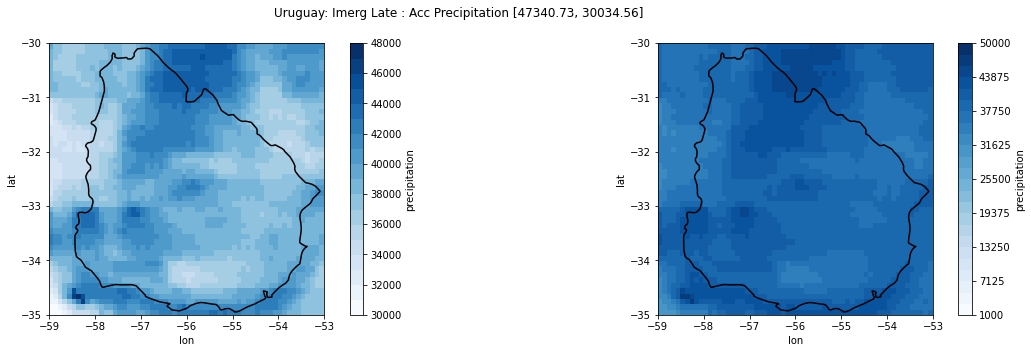

In [22]:
# coordinate reference system
crs={'init':'epsg:4326'}

geodf_shape = get_geometry_uruguay()

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(20,5))  

df_xr_acc = df_xr.sum(dim="time")['precipitation']


df_xr_acc.plot(ax=axs[0], x="lon", y="lat", cmap="Blues", levels=20)
geodf_shape.boundary.plot(ax=axs[0], color="black")

df_xr_acc.plot(ax=axs[1], x="lon", y="lat", cmap="Blues", levels=np.linspace(1000, 50000, 25))
geodf_shape.boundary.plot(ax=axs[1], color="black")

prec_max = np.round(float(df_xr_acc.max().data), 2)
prec_min = np.round(float(df_xr_acc.min().data), 2)
fig.suptitle(f'Uruguay: Imerg Late : Acc Precipitation [{prec_max}, {prec_min}]', fontsize=12)
plt.show()